# Comparison of Predictive models to help Detection of Underwater objects with Sonar

## Sonar for underwater object detection
__Sonar__ (sound navigation and ranging) is a technique based on the principle of reflection of ultrasonic sound waves. These waves propagate through water and reflect on hitting the ocean bed or any object obstructing its path.Sonar has been widely used in submarine navigation, communication with or detection of objects on or under the water surface (like other vessels), hazard identification, etc.There are two types of sonar technology used — passive (listening to the sound emitted by vessels in the ocean) and active (emitting pulses and listening for their echoes).It is important to note that research shows the use of active sonar can cause mass strandings of marine animals.

## About the data
The data considered for analysis contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.


## Import required libraries and Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [9]:
data = pd.read_csv("B:\Machine learning\Sonardata.csv",header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Understand the problem statement:

Sonar data are collected in a dataset. which will determine whether we have found a rock or a mine. The given data contains 60 features which is high in number. So, the project involves reduction of dimensionality by determining the necessary variation that needs to be explained 
The demonstration of models of reduced using suitable algorithms with respect to the data considered. Determination of most effective model that can classify the data with the highest accuracy. The classifiers also have to be cross validated to check to make sure that we get the optimal model, that can be used on future data and which is capable of yielding the best possible predictions

## Check the Data

In [10]:
print("No, of Rows in the data : ", data.shape[0])
print("No, of Columns in the data : ", data.shape[1])

No, of Rows in the data :  208
No, of Columns in the data :  61


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

There are no null values in the dataset

## Data Preprocessing

In [12]:
data[60]= pd.Categorical(data[60])
print(data[60].dtype)
print(data.groupby(60).size())

category
60
M    111
R     97
dtype: int64


A balanced dataset is the one that contains an equal or almost equal number of samples from the differing classes.The dataset seems to be almost balanced. So, there's no need for performing techniques neccesary to balance the dataset.

In [6]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data[60]= label_encoder.fit_transform(data[60])
  
data[60].unique()

array([1, 0])

__Label Encoding__ is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

## Performing EDA

__Exploratory Data Analysis (EDA)__ is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations. 

# 1. Countplot

60
0    111
1     97
dtype: int64


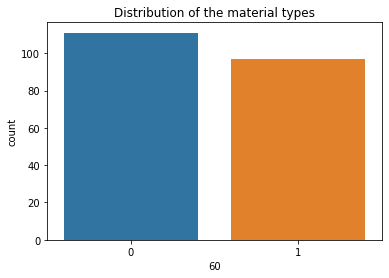

In [8]:
print(data.groupby(60).size())
sb.countplot(x=60,data=data)
plt.title("Distribution of the material types")
plt.show()

In [9]:
from collections import Counter
dep_var = data.values[:,-1]
counter = Counter(dep_var)
for k,v in counter.items():
    per = v / len(dep_var) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1.0, Count=97, Percentage=46.635%
Class=0.0, Count=111, Percentage=53.365%


In [10]:
data.groupby(60).mean().T

60,0,1
0,0.034989,0.022498
1,0.045544,0.030303
2,0.050720,0.035951
3,0.064768,0.041447
4,0.086715,0.062028
5,0.111864,0.096224
6,0.128359,0.114180
7,0.149832,0.117596
8,0.213492,0.137392
9,0.251022,0.159325


__Interpretation__: The given table represents the mean of the each features which is distinguished by the categories present in the data. We can observe that the mean of these values are different from each other 

# 2. Histogram

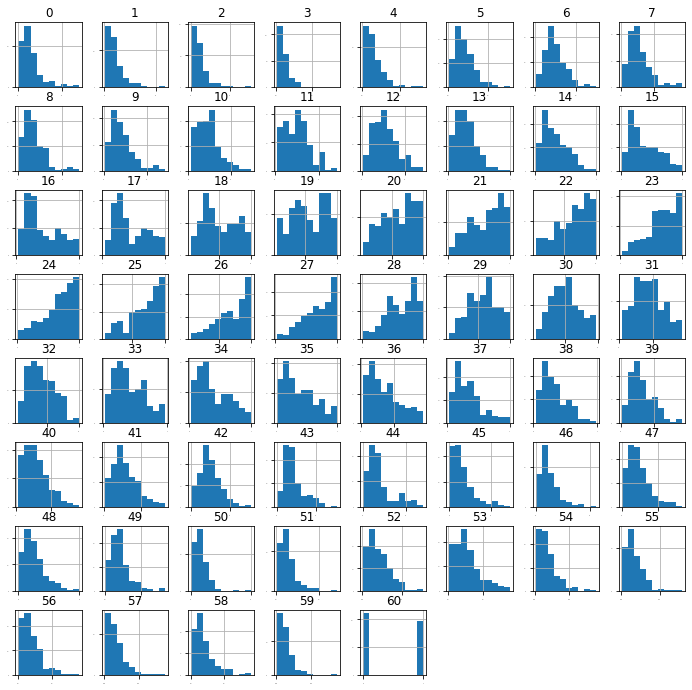

In [11]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

From the histogram plots of all the features, We can observe that the distrbution exhibits gaussian distribution and exponentain distribution like behavior

# 3. Density plots

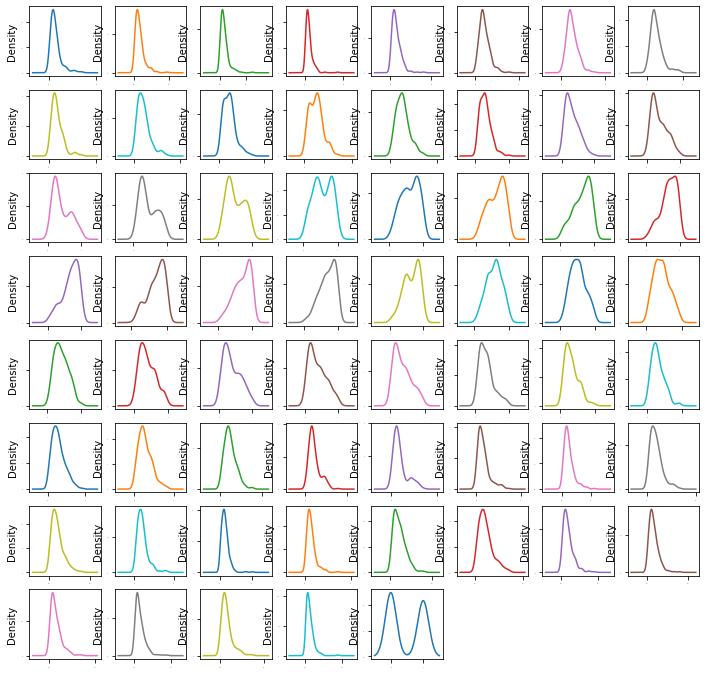

In [12]:
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

__Interpretation__: It can be observed that most of the features have a skewed distribution

# 4. Heatmap

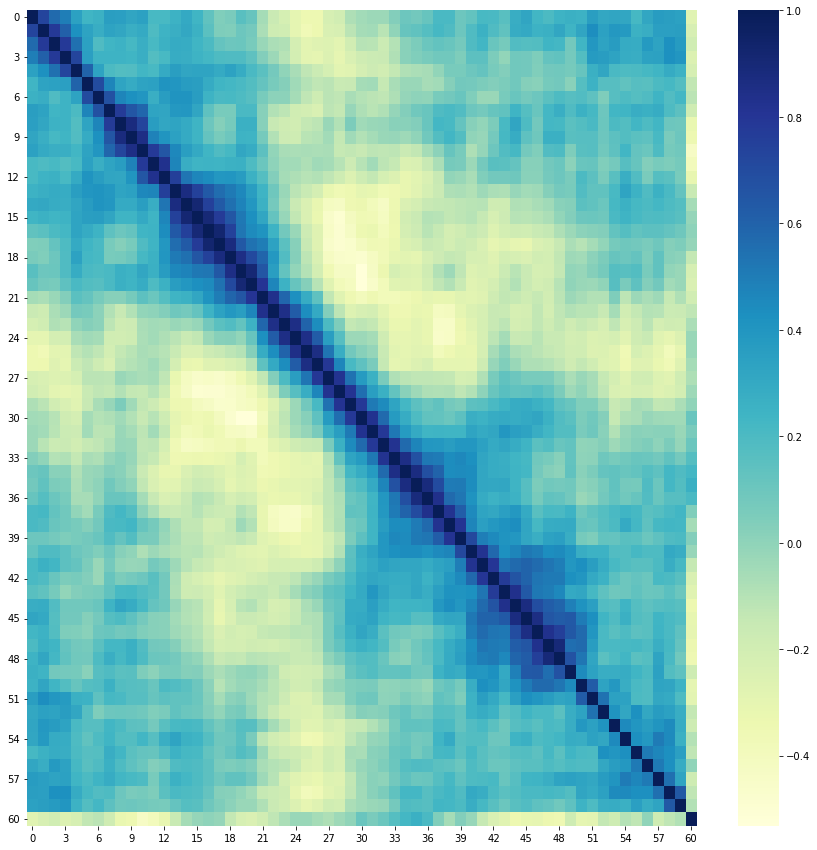

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
sb.heatmap(data.corr(), cmap="YlGnBu")
fig.set_size_inches(15,15)
plt.show()

__Interpretation__:

- It looks like there is also some structure in the order of the attributes.
- We can also observe that almost all the features has a negative correlation with the target variable as the colour is distinctly yellow except for the central region spanning from 24 to 36 
- The blue around the diagonal suggests that attributes that are next to each other are generally more correlated with each other.
- The yellow patches also suggest some moderate negative correlation the further attributes are away from each other in the order in the dataset.
- This makes sense if the order of the attributes refers to the angle of sensors for the sonar device.

In [42]:
d1 = data.corrwith(data[60])
display(d1.head(30),d1.tail(30))

0    -0.271694
1    -0.231238
2    -0.192195
3    -0.250638
4    -0.222232
5    -0.132327
6    -0.114748
7    -0.189314
8    -0.321448
9    -0.341142
10   -0.432855
11   -0.392245
12   -0.312811
13   -0.157277
14   -0.057318
15   -0.011581
16    0.003969
17   -0.014612
18   -0.138204
19   -0.224115
20   -0.242755
21   -0.201361
22   -0.127413
23   -0.074041
24   -0.025306
25   -0.028063
26   -0.054997
27   -0.082486
28   -0.036639
29   -0.004219
dtype: float64

31    0.055275
32    0.107184
33    0.172010
34    0.227670
35    0.269151
36    0.209055
37    0.040527
38   -0.056910
39    0.035928
40   -0.020942
41   -0.144147
42   -0.234077
43   -0.273779
44   -0.339406
45   -0.305610
46   -0.301697
47   -0.329333
48   -0.351312
49   -0.180224
50   -0.293205
51   -0.288651
52   -0.141871
53   -0.182687
54   -0.095639
55   -0.129341
56   -0.000933
57   -0.184191
58   -0.130826
59   -0.090055
60    1.000000
dtype: float64

__Interpretation__: As we observed on the correlation plot most of the features has negative correlation with the study variable.

# 5. Boxplots

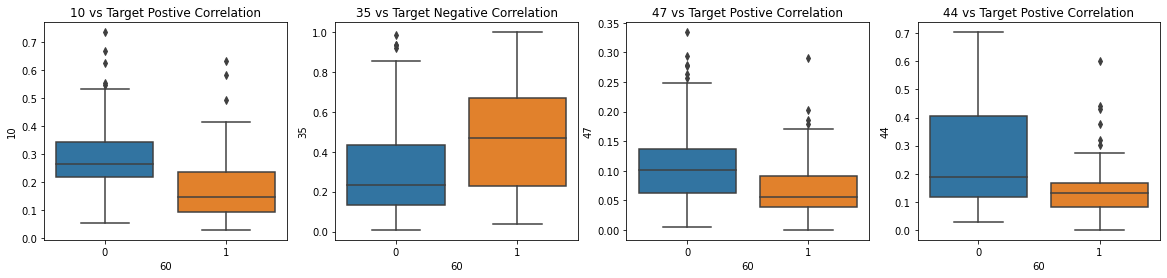

In [43]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sb.boxplot(x=60, y=10 , data=data, ax=axes[0])
axes[0].set_title('10 vs Target Postive Correlation')

sb.boxplot(x=60, y=35, data=data, ax=axes[1])
axes[1].set_title('35 vs Target Negative Correlation')


sb.boxplot(x=60, y=47, data=data, ax=axes[2])
axes[2].set_title('47 vs Target Postive Correlation')


sb.boxplot(x=60, y=44, data=data, ax=axes[3])
axes[3].set_title('44 vs Target Postive Correlation')

plt.show()


__Interpretation:__
- The above plot represents the distribution of the features 10, 35, 47 and 60 with respect to the categories present in the target variable compared to the variables with which those features has positive and negative correlation where the blue plot represents mine and orange represents rock. 

# Principal component analysis
Exploratory Data Analysis (EDA) is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations. 

In [16]:
X = data.loc[:, data.columns != 60]
y = data.loc[:, data.columns == 60]
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_tr)

StandardScaler()

In [18]:
train_img = scaler.transform(X_tr)
test_img = scaler.transform(X_t)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(train_img)
pca.n_components_

29

In [20]:
X_train = pca.transform(train_img)
X_test= pca.transform(test_img)

## LOGISTIC REGRESSION
Logistic Regression is a supervised learning that computes the probabilities for classification problems with two outcomes. It can also be extended to predict several classes.
It uses logistic function which provides the value of result to be 0 or 1 and we can regard this value as the probability of predicting classes.

In [21]:
LR = LogisticRegression()
LR.fit(X_train, y_tr)
y_pred =LR.predict(X_test)

In [22]:
print('\033[1mAccuracy of logistic regression classifier on test set:\033[0m {:.2f}'.format(LR.score(X_test, y_t)))
print('---------------------------------------------------------------\n')
print('\033[1mConfusion_matrix:\n  \033[0m',confusion_matrix(y_t, y_pred))
print("\033[1mClassificationreport:\n \033[0m",classification_report(y_t, y_pred))

Accuracy of logistic regression classifier on test set: 0.79
---------------------------------------------------------------

Confusion_matrix:
   [[19  2]
 [ 7 14]]
Classificationreport:
                precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.88      0.67      0.76        21

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.80      0.79      0.78        42



### Interpretation:
1. The accuracy score suggests that the model is 83% accurate
2. The diagonal values in the confusion matrix depicts the actual no of materials predicted correctly. The non diagonal elements represent the mispredicted no of materials

3. __Classification report__
   
   __Out of all the positive predictions:-__ 
- Only 77% can be accurately predicted that the material is M that is mine (metal cylinder).
- Only 94% can be accurately predicted that the material is a rock.

  __Out of all the actual positives:-__
- 95% of the predictions are accurate that the material is M that is mine (metal cylinder).
- 71% of the predictions are accurate that the material is a rock.

Here the F score and macro average(weighted average) suggests that the model does a good job in predicting the material.

## LINEAR DISCRIMINANT ANALYSIS 
LDA is a classification model which can be used to model continuous predictors which are assumed to follow normal distribution and the dependent variable is categorical in nature. This method uses Bayes theorem to determine the class to which dependent variable belongs to.

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_tr)
y_pred1 =lda.predict(X_test)

In [24]:
print('\033[1mAccuracy of LDA :\033[0m {:.2f}'.format(accuracy_score(y_t,y_pred1)))
print('---------------------------------------------------------------\n')
print('\033[1mConfusion_matrix:\n  \033[0m',confusion_matrix(y_t, y_pred1))
print("\033[1mClassificationreport:\n \033[0m",classification_report(y_t, y_pred1))

Accuracy of LDA : 0.76
---------------------------------------------------------------

Confusion_matrix:
   [[18  3]
 [ 7 14]]
Classificationreport:
                precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.82      0.67      0.74        21

    accuracy                           0.76        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



### Interpretation:
1. The accuracy score suggests that the model is 76% accurate
2. The diagonal values in the confusion matrix depicts the actual no of materials predicted correctly. The non diagonal elements represent the mispredicted no of materials

3. __Classification report__
   
   __Out of all the positive predictions:-__ 
- Only 72% can be accurately predicted that the material is M that is mine (metal cylinder).
- Only 84% can be accurately predicted that the material is a rock.

  __Out of all the actual positives:-__
- 86% of the predictions are accurate that the material is M that is mine (metal cylinder).
- 67% of the predictions are accurate that the material is a rock.

Here the F score and macro average(weighted average) suggests that the model does a good job in predicting the material.

## QUADRATIC DISCRIMINANT ANALYSIS
Here, we follow the similar theory of the LDA and data except that we assume that the covariance matrix can be different for different classes.

In [25]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_tr)
y_pred2 =qda.predict(X_test)

In [26]:
print('\033[1mAccuracy of QDA :\033[0m {:.2f}'.format(accuracy_score(y_t,y_pred2)))
print('---------------------------------------------------------------\n')
print('\033[1mConfusion_matrix:\n  \033[0m',confusion_matrix(y_t, y_pred2))
print("\033[1mClassificationreport:\n \033[0m",classification_report(y_t, y_pred2))

Accuracy of QDA : 0.86
---------------------------------------------------------------

Confusion_matrix:
   [[20  1]
 [ 5 16]]
Classificationreport:
                precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.94      0.76      0.84        21

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42



### Interpretation:
1. The accuracy score suggests that the model is 86% accurate
2. The diagonal values in the confusion matrix depicts the actual no of materials predicted correctly. The non diagonal elements represent the mispredicted no of materials

3. __Classification report__
   
   __Out of all the positive predictions:-__ 
- Only 90% can be accurately predicted that the material is M that is mine (metal cylinder).
- Only 94% can be accurately predicted that the material is a rock.

  __Out of all the actual positives:-__
- 95% of the predictions are accurate that the material is M that is mine (metal cylinder).
- 76% of the predictions are accurate that the material is a rock.

Here the F score and macro average(weighted average) suggests that the model does a good job in predicting the material.

## Naive Bayes Classifier
In this model, we make an assumption that the independent variables are assumed to be independent in a particular class (Conditional independence). This is the naïve assumption. 
This also involves bayes theorem to classify the class. Since the data we have  contains only continuous variables we model it using Gaussian naïve bayes modelling.

In [27]:
NB = GaussianNB()
NB.fit(X_train,y_tr)
y_pred5 =qda.predict(X_test)

In [28]:
print('\033[1mAccuracy of QDA :\033[0m {:.2f}'.format(accuracy_score(y_t,y_pred5)))
print('---------------------------------------------------------------\n')
print('\033[1mConfusion_matrix:\n  \033[0m',confusion_matrix(y_t, y_pred5))
print("\033[1mClassificationreport:\n \033[0m",classification_report(y_t, y_pred5))

Accuracy of QDA : 0.86
---------------------------------------------------------------

Confusion_matrix:
   [[20  1]
 [ 5 16]]
Classificationreport:
                precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.94      0.76      0.84        21

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42



### Interpretation:
1. The accuracy score suggests that the model is 86% accurate
2. The diagonal values in the confusion matrix depicts the actual no of materials predicted correctly. The non diagonal elements represent the mispredicted no of materials

3. __Classification report__
   
   __Out of all the positive predictions:-__ 
- Only 80% can be accurately predicted that the material is M that is mine (metal cylinder).
- Only 94% can be accurately predicted that the material is a rock.

  __Out of all the actual positives:-__
- 95% of the predictions are accurate that the material is M that is mine (metal cylinder).
- 76% of the predictions are accurate that the material is a rock.

Here the F score and macro average(weighted average) suggests that the model does a good job in predicting the material.

## K nearest neighbour
This model is a highly used model as it does not make any prior assumption regarding the distribution of data and it does not use bayes theorem.It is based on distance. We can use different measures of distance to do that

In [29]:
neighbors = (1,2,3,4,5,6,7,8,9,10)
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
cv = KFold(n_splits=10,random_state=1,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
grid_result = grid.fit(X_train, y_tr)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.880147 using {'n_neighbors': 1}
0.880147 (0.066567) with: {'n_neighbors': 1}
0.813603 (0.062695) with: {'n_neighbors': 2}
0.837868 (0.053441) with: {'n_neighbors': 3}
0.789338 (0.077417) with: {'n_neighbors': 4}
0.795956 (0.064254) with: {'n_neighbors': 5}
0.752941 (0.095571) with: {'n_neighbors': 6}
0.766912 (0.101636) with: {'n_neighbors': 7}
0.765809 (0.089347) with: {'n_neighbors': 8}
0.754044 (0.106446) with: {'n_neighbors': 9}
0.747794 (0.111066) with: {'n_neighbors': 10}


In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_tr)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred3 = classifier.predict(X_test)
print('\033[1mAccuracy of KNN :\033[0m {:.2f}'.format(accuracy_score(y_t,y_pred3)))
print('---------------------------------------------------------------\n')
print('\033[1mConfusion_matrix:\n  \033[0m',confusion_matrix(y_t, y_pred3))
print("\033[1mClassificationreport:\n \033[0m",classification_report(y_t, y_pred3))

Accuracy of KNN : 0.81
---------------------------------------------------------------

Confusion_matrix:
   [[20  1]
 [ 7 14]]
Classificationreport:
                precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.93      0.67      0.78        21

    accuracy                           0.81        42
   macro avg       0.84      0.81      0.81        42
weighted avg       0.84      0.81      0.81        42



### Interpretation:
1. The accuracy score suggests that the model is 81% accurate
2. The diagonal values in the confusion matrix depicts the actual no of materials predicted correctly. The non diagonal elements represent the mispredicted no of materials

3. __Classification report__
   
   __Out of all the positive predictions:-__ 
- Only 74% can be accurately predicted that the material is M that is mine (metal cylinder).
- Only 93% can be accurately predicted that the material is a rock.

  __Out of all the actual positives:-__
- 95% of the predictions are accurate that the material is M that is mine (metal cylinder).
- 67% of the predictions are accurate that the material is a rock.

Here the F score and macro average(weighted average) suggests that the model does a good job in predicting the material.

## DECISION TREE
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [32]:
dec_tree = tree.DecisionTreeClassifier()

In [33]:
criterion =['gini','entrophy']
max_depth = [2,4,6,8,10,12]
ccp_alpha = [0,0.1,0.2,0.3]
parameters=dict(dec_tree__criterion = criterion,dec_tree__max_depth = max_depth,dec_tree__ccp_alpha=ccp_alpha )

In [34]:
pipe=Pipeline(steps=[('dec_tree',dec_tree)])

In [35]:
clf_gs = GridSearchCV(pipe,parameters)
clf_gs.fit(X_train,y_tr)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__ccp_alpha': [0, 0.1, 0.2, 0.3],
                         'dec_tree__criterion': ['gini', 'entrophy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

In [36]:
print('Best Criterian:',clf_gs.best_estimator_.get_params()
     ['dec_tree__criterion'])
print('Best max_depth:',clf_gs.best_estimator_.get_params()
     ['dec_tree__max_depth'])
print('Best ccp alpha:',clf_gs.best_estimator_.get_params()
     ['dec_tree__ccp_alpha'])

Best Criterian: gini
Best max_depth: 4
Best ccp alpha: 0


In [37]:
tree = DecisionTreeClassifier(ccp_alpha=0,max_depth=12,criterion='gini')
tree.fit(X_train,y_tr)
y_pred4 = tree.predict(X_test)

In [38]:
print('\033[1mAccuracy of tree :\033[0m {:.2f}'.format(accuracy_score(y_t,y_pred4)))
print('---------------------------------------------------------------\n')
print('\033[1mConfusion_matrix:\n  \033[0m',confusion_matrix(y_t, y_pred4))
print("\033[1mClassificationreport:\n \033[0m",classification_report(y_t, y_pred4))

Accuracy of tree : 0.76
---------------------------------------------------------------

Confusion_matrix:
   [[17  4]
 [ 6 15]]
Classificationreport:
                precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.79      0.71      0.75        21

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



### Interpretation:
1. The accuracy score suggests that the model is 81% accurate
2. The diagonal values in the confusion matrix depicts the actual no of materials predicted correctly. The non diagonal elements represent the mispredicted no of materials

3. __Classification report__
   
   __Out of all the positive predictions:-__ 
- Only 81% can be accurately predicted that the material is M that is mine (metal cylinder).
- Only 81% can be accurately predicted that the material is a rock.

  __Out of all the actual positives:-__
- 81% of the predictions are accurate that the material is M that is mine (metal cylinder).
- 81% of the predictions are accurate that the material is a rock.

Here the F score and macro average(weighted average) suggests that the model does a good job in predicting the material.

# 6. Plot of the tree 

<function matplotlib.pyplot.show(close=None, block=None)>

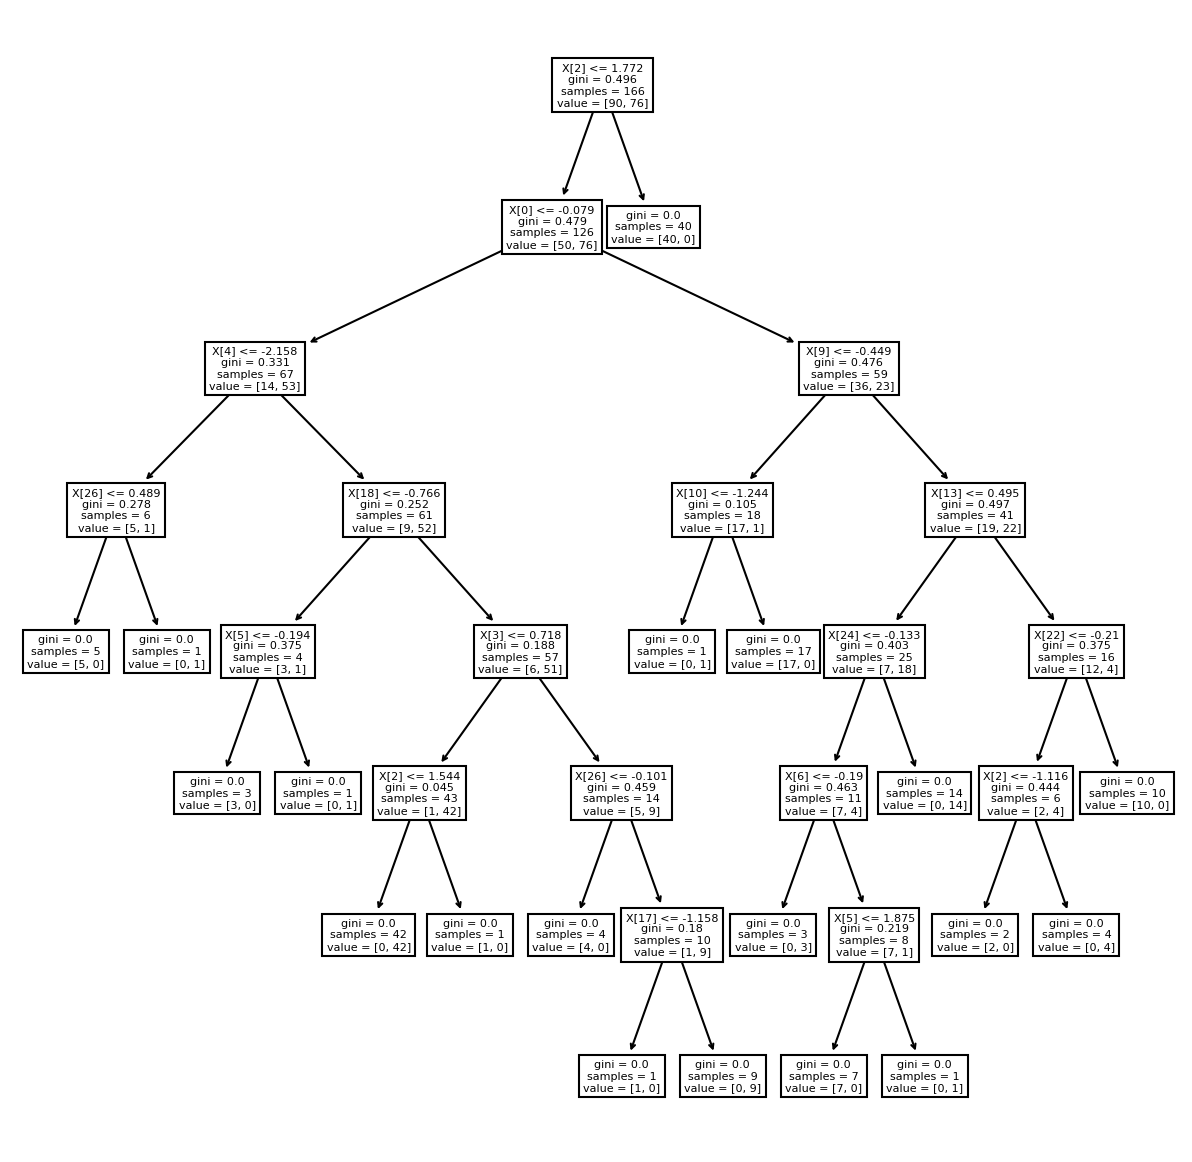

In [39]:
plt.figure(figsize = (10,10),dpi = 150)
plot_tree(tree)
plt.show

## Accuracy for different Cross - validated models
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.
The three steps involved in cross-validation are as follows :
1.	Reserve some portion of sample data-set.
2.	Using the rest data-set train the model.
3.	Test the model using the reserve portion of the data-set.
We use methods like gridsearchcv and Kfold in this report


In [40]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)))
models.append(('tree', DecisionTreeClassifier(ccp_alpha=0,max_depth=12,criterion='gini')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,X_train, y_tr, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.753676
LDA: 0.711029
QDA: 0.753676
NB: 0.675368
KNN: 0.880147
tree: 0.693015


# 7. Boxplot for cross validated accuracy measure

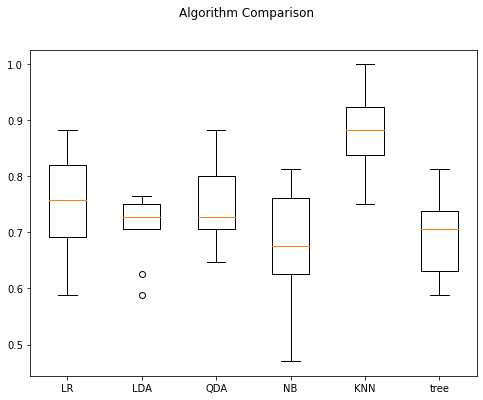

In [41]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

-	The above boxplot represents the distribution of accuracy values obtained through cross validation for different models that can be used to classify the considered data
-	KNN has the highest median of the accuracy.
-	All the other models have no much difference in the accuracy values


## Interpretation
Observing the accuracies obtained by all the models with and without cross validation. We observe that the highest accuracy is seen in knn. Therefore, if had to suggest a model,__KNN would be the recommended one.__